# 필요모듈 임포트 및 폰트 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 데이터 전처리(Preprocessing)

## 1. 법정동 코드 가공

### 1. loc1 - 2019년

In [3]:
locCode1 = pd.read_excel('../data/법정동코드.xlsx')
locCode1.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
locCode1.shape

(20556, 7)

In [5]:
locCode1[locCode1['읍면동명'].isnull()]

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN
...,...,...,...,...,...,...,...
20021,4888000000,경상남도,거창군,NaN,NaN,19880423,NaN
20128,4889000000,경상남도,합천군,NaN,NaN,19880423,NaN
20338,5000000000,제주특별자치도,NaN,NaN,NaN,20060701,NaN
20339,5011000000,제주특별자치도,제주시,NaN,NaN,20060701,NaN


In [6]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode1 = locCode1[locCode1['읍면동명'].isnull()]
locCode1.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN


In [7]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
# locCode[locCode['시군구명'].isnull()]
locCode1 = locCode1[locCode1['시군구명'].notnull()]
locCode1.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN


In [8]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
# col1 = [str(t)[:5] for t in locCode['법정동코드']]
locCode1['법정동코드'] = locCode1['법정동코드'].astype('str')
col1 = locCode1['법정동코드'].str[:5]
locCode1['지역코드'] = col1
locCode1.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN,11140
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN,11170
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN,11200
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN,11215


In [9]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
idx = locCode1[locCode1['시도명'] == '서울특별시'].index
# loc
loc1 = locCode1[['시도명', '시군구명', '지역코드']].loc[idx]
loc1

,시도명,시군구명,지역코드
1,서울특별시,종로구,11110
89,서울특별시,중구,11140
164,서울특별시,용산구,11170
201,서울특별시,성동구,11200
219,서울특별시,광진구,11215
227,서울특별시,동대문구,11230
238,서울특별시,중랑구,11260
245,서울특별시,성북구,11290
285,서울특별시,강북구,11305
290,서울특별시,도봉구,11320


### 2. loc2 - 2020년

In [10]:
# 2020년 데이터를 위한 새로운 locCode2 생성
locCode2 = pd.read_excel('../data/법정동코드.xlsx')

In [11]:
# 서울특별시 데이터만을 사용할거기에 '시도명'에 서울특별시만 남기고 삭제
locCode2 = locCode2[locCode2['시도명'] == '서울특별시']
locCode2.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [12]:
# 읍명동명이 NaN이 아닌 데이터만 추출

locCode2 = locCode2[locCode2['읍면동명'].notnull()]

# 또한 읍명동명 -> 법정동명으로 변경
locCode2.rename(columns={'읍면동명' : '법정동명'}, inplace=True)

# 시도명, 시군구명, 법정동명만 추출
loc2 = locCode2[['시도명', '시군구명', '법정동명']]
loc2

,시도명,시군구명,법정동명
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동
5,서울특별시,종로구,효자동
6,서울특별시,종로구,창성동
...,...,...,...
488,서울특별시,강동구,둔촌동
489,서울특별시,강동구,암사동
490,서울특별시,강동구,성내동
491,서울특별시,강동구,천호동


## 2. 실거래가 데이터 가공

### 2019년도 서울 아파트 실거래가 데이터

In [13]:
# 실거래가 데이터 불러오기
apt1 = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding='cp949')
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [14]:
# 데이터 프레임의 컬럼을 확인합니다.
apt1.columns

Index(['건축년도', '거래년도', '거래월', '거래일자', '법정동', '거래금액', '아파트이름', '전용면적', '지역코드',
       '층', '지번'],
      dtype='object')

In [15]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt1.shape

(68864, 11)

In [16]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt1.isnull().sum()

건축년도     0
거래년도     0
거래월      0
거래일자     0
법정동      0
거래금액     0
아파트이름    0
전용면적     0
지역코드     0
층        0
지번       0
dtype: int64

In [17]:
# 실거래가 데이터프레임 정보 조회
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  object 
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [18]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경
apt1['거래금액'] = [v+k for v,k in apt1['거래금액'].str.split(',')]
apt1['거래금액'] = apt1['거래금액'].astype('int64')
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73


In [19]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  int64  
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 5.8+ MB


In [20]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt1['전용면적(평)'] = round(apt1['전용면적'] / 3.306, 2)
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [21]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
apt1['전용면적(평)2'] = np.trunc(apt1['전용면적(평)'])
apt1['전용면적(평)2'] = apt1['전용면적(평)2'].astype('int64')
# apt1['전용면적(평)2'] = [int(t) for t in apt2['전용면적(평)']]
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45


In [22]:
# 아래의 코드를 실행하여 전용면적을 범주화 합니다.
daterange = np.arange(0,(int(max(apt1['전용면적(평)2']) / 5) + 2) * 5, 5)
apt1['전용면적(평)3'] = pd.cut(apt1['전용면적(평)2'], daterange)
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [23]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt1['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [24]:
# loc 인덱서를 이용하여 거래월이 1~6인 경우 상반기, 7~12인 경우 하반기의 값을 가지는 컬럼을 생성합니다.
apt1['반기'] = np.where((apt1['거래월'] >= 1) & (apt1['거래월'] < 7), '상반기', '하반기') # 상항 연산자와 유사
apt1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기


In [25]:
# loc 인덱서를 이용하여 거래월이 1~3월인 경우 1분기, 4~6월인경우 2분기,
# 7~9월인경우 3분기, 10~12월인 경우 4분기의 값을 가지는 컬럼을 생성합니다.
apt1.loc[(apt1['거래월'] >= 1) & (apt1['거래월'] < 4), '분기'] = '1분기'
apt1.loc[(apt1['거래월'] >= 4) & (apt1['거래월'] < 7), '분기'] = '2분기'
apt1.loc[(apt1['거래월'] >= 7) & (apt1['거래월'] < 10), '분기'] = '3분기'
apt1.loc[(apt1['거래월'] >= 10) & (apt1['거래월'] <= 12), '분기'] = '4분기'
apt1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기,4분기
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기,4분기
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기,4분기
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기,4분기


In [26]:
# 전용면적(평)2 컬럼을 이용하여 평당 거래 금액 컬럼을 생성합니다.
apt1['평당거래금액'] = apt1['거래금액'] / apt1['전용면적(평)2']
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556


### 2020년도 서울 아파트 실거래가 데이터

In [27]:
# 실거래가 데이터 불러오기
apt2 = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding='cp949')
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [28]:
# 데이터 프레임의 컬럼을 확인합니다.
apt2.columns

Index(['법정동명', '건물면적', '층정보', '건물주용도코드', '건물주용도', '거래금액', '건축년도', '아파트명'], dtype='object')

In [29]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt2.shape

(176001, 8)

In [30]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt2.isnull().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

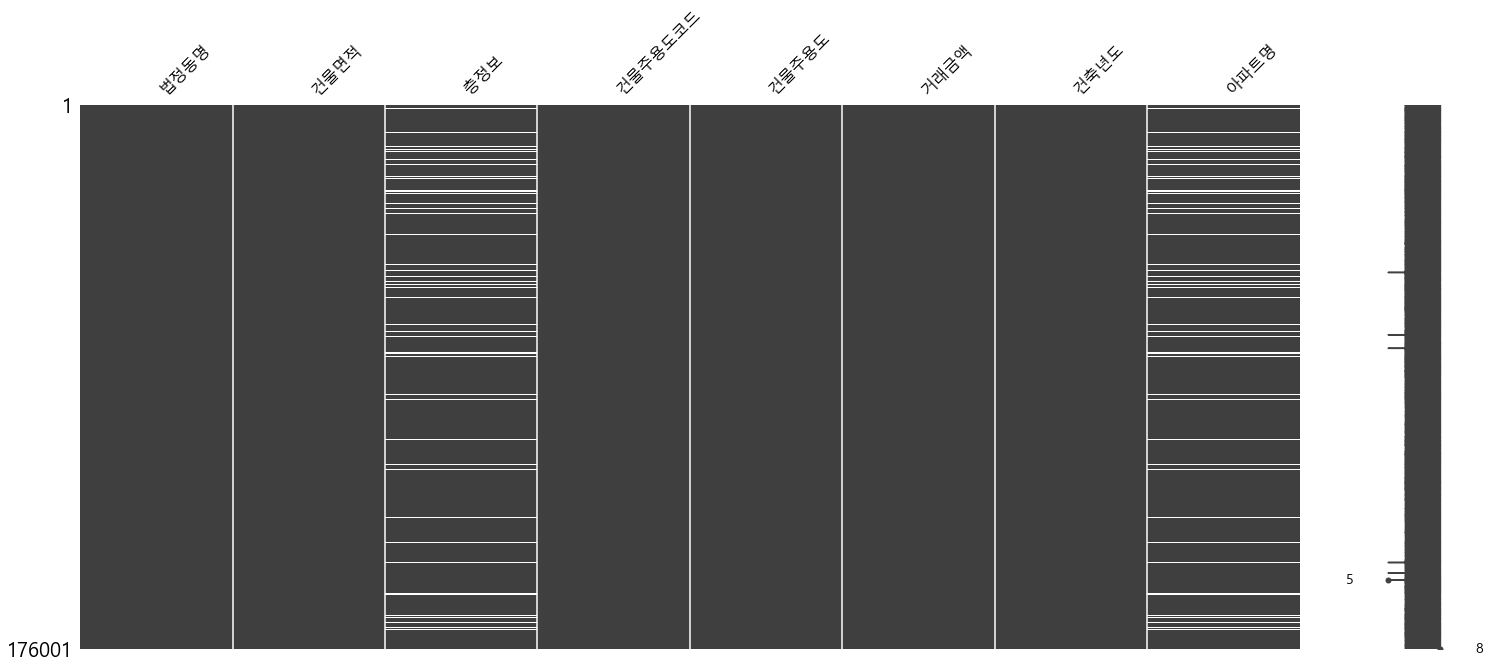

In [31]:
msno.matrix(apt2, width_ratios=(10, 1))
plt.show()

In [32]:
# 실거래가 데이터프레임 정보 조회
apt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [33]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt2['건물면적(평)'] = round(apt2['건물면적'] / 3.306, 2)
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평)
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,18.12
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아,25.64
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라,11.16
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성,18.01
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변,19.49


In [34]:
apt2['건물면적(평)'].dtype

dtype('float64')

In [35]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다. 
col2 = [int(t) for t in apt2['건물면적(평)']]
apt2['건물면적(평)2'] = col2
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,18.12,18
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아,25.64,25
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라,11.16,11
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성,18.01,18
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변,19.49,19


In [36]:
# 아래의 코드를 실행하여 전용면적을 범주화 합니다.
daterange = np.arange(0,(int(max(apt2['건물면적(평)2']) / 5) + 2) * 5, 5)
apt2['건물면적(평)3'] = pd.cut(apt2['건물면적(평)2'], daterange)
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]"
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아,25.64,25,"(20, 25]"
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라,11.16,11,"(10, 15]"
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성,18.01,18,"(15, 20]"
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변,19.49,19,"(15, 20]"


In [37]:
apt2['건물면적(평)3'].unique()

[(15, 20], (20, 25], (10, 15], (30, 35], (40, 45], ..., (695, 700], (540, 545], (510, 515], (525, 530], (775, 780]]
Length: 105
Categories (105, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (705, 710] < (735, 740] < (775, 780] < (845, 850]]

In [38]:
apt2['거래금액'] = apt2['거래금액'] / 10000

In [39]:
# 전용면적(평)2 컬럼을 이용하여 평당 거래 금액 컬럼을 생성합니다.
apt2['평당거래금액'] = apt2['거래금액'] / apt2['건물면적(평)2']
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111
1,길음동,84.77,18.0,2001,아파트,120000.0,0.0,롯데캐슬 클라시아,25.64,25,"(20, 25]",4800.000000
2,구로동,36.90,1.0,2001,아파트,10500.0,1994.0,궁전아트빌라,11.16,11,"(10, 15]",954.545455
3,산천동,59.55,2.0,2001,아파트,83000.0,2001.0,리버힐삼성,18.01,18,"(15, 20]",4611.111111
4,이촌동,64.43,5.0,2001,아파트,73500.0,1971.0,강변,19.49,19,"(15, 20]",3868.421053


## 3. 데이터 프레임 결합

### 2019년도 데이터 프레임 결합

In [40]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
loc1['지역코드'] = loc1['지역코드'].astype('int64')
df1 = apt1.merge(loc1, on='지역코드')
df1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구


In [41]:
# 지역 코드 컬럼을 삭제합니다.
df1.drop(columns='지역코드', inplace=True)
df1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구


### 2020년도 데이터 프레임 결합

In [42]:
# 법정동명을 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
df2 = apt2.merge(loc2, on='법정동명')
df2

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111,서울특별시,성북구
1,장위동,116.91,2.0,2001,아파트,127000.0,0.0,래미안장위퍼스트하이,35.36,35,"(30, 35]",3628.571429,서울특별시,성북구
2,장위동,59.99,17.0,2001,아파트,82000.0,0.0,래미안장위퍼스트하이,18.15,18,"(15, 20]",4555.555556,서울특별시,성북구
3,장위동,62.55,NaN,1001,단독주택,71460.0,1970.0,NaN,18.92,18,"(15, 20]",3970.000000,서울특별시,성북구
4,장위동,84.48,12.0,2001,아파트,115000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",4600.000000,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,29.98,5.0,2002,연립주택,29500.0,2015.0,동원스위트홈,9.07,9,"(5, 10]",3277.777778,서울특별시,마포구
179814,구수동,64.20,3.0,2002,연립주택,50800.0,2009.0,근상프리즘1동,19.42,19,"(15, 20]",2673.684211,서울특별시,마포구
179815,구수동,29.95,2.0,2002,연립주택,38000.0,2015.0,동원스위트홈,9.06,9,"(5, 10]",4222.222222,서울특별시,마포구
179816,구수동,41.21,3.0,2002,연립주택,39000.0,2015.0,동원스위트홈(16-5),12.47,12,"(10, 15]",3250.000000,서울특별시,마포구


# 2. 데이터 분석

## 계획

2020년 단독
1. 지역구 평당 거래 금액, 평수 별 거래 금액 (범주화/ 강사님의 의도를 파악하여 써봤음)
    -> 거래량 파악

2. 특정구 지정 하여 그안에서 동별 평당 거래 금액 및 평수별 거래금액 (구 중에서 제일 비싼곳, 제일 낮은곳)
    ->평수별 갯수 ?  (ex. 광화문은 회사 밀집지역이니깐 평수가 낮은 곳이 많지 않을까? , )
    
3. 건축년도 별 가격차이 같은 구( nan 혹은 0은 drop)
번외. 층? 아파트별로? df2.value_counts('아파트명').head(30) 보류
->
★추가) 2019년과 2020년 같이할 수 있는 것
4. 아파트 브랜드:힐스테이트, 자이,래미안, 프루지오, 롯데캐슬,E편한세상 etc : 아파트명(2020,2019)년 기준으로 분류?
-> 아파트 브랜드네임에 따른 가격비교 / 거래량
5.2020년 3월쯤 증가 코로나 (코로나의 미치는 영향ㅇ ㅣ있을까? 가설 5월부터 화폐가치 떨어지면서  ~~ 주거지 증가)
2019년만 하는것
6. 2019-
2019년 자료로만 분석시: 거래일자 관련한 분석 !
제일 높은 구 제일낮은 구에서 아파트명 제일 많은 것 확인해서
일자별 금액 변동 그래프 / 평수 거래별 확인해보고, 데이터 부족하면 평당 거래 금액?
번외) 다하고 시간남으면
건물주용도별로 구분 아파트/단독주택/연립주택

## 방향

## 분석 진행

In [43]:
df2[df2['시군구명'] == '성북구']['건물면적(평)2'].unique()

array([ 18,  35,  25,  23,  57,  41,  17,  16,  20,  24, 120,   9,  12,
         8,  13,  10,  15,  11,  14,  19,  40,  45,  31,   5,  38,  80,
        53,  62,  21,  51,  96,  48,  30, 139,  22,  74,  58,   7,   6,
        33,   4,  29,  75,  43,  34,  44,  50,  68,  36,  28,  46,  47,
        72, 155,  64, 106,  60,  73,  49,  63,  27,  76,  26,  42, 195,
        65,  71,  54,  56,  81,  84, 112, 103,  37,  55,  32,  82,  70,
        91,  39, 147,  52,  98,  79,  94, 284, 148,  66, 191, 471,  59,
       101,  77,  67, 113, 176,  61,  88, 131, 138,  99, 123, 159, 105,
        95, 234, 133, 196, 167,  85, 168,  97, 100, 268, 118,  93, 122,
       127, 142, 166, 262, 228, 392, 104,  90, 331, 199, 181, 145,  78,
         3, 110, 179, 126, 186,  69,  83, 128, 175,   2, 202], dtype=int64)

In [44]:
df2['건물면적(평)3'].unique()

[(15, 20], (30, 35], (20, 25], (55, 60], (40, 45], ..., (500, 505], (410, 415], (735, 740], (365, 370], (775, 780]]
Length: 105
Categories (105, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (705, 710] < (735, 740] < (775, 780] < (845, 850]]

In [45]:
df3 = df2[df2['건물주용도'] == '아파트']

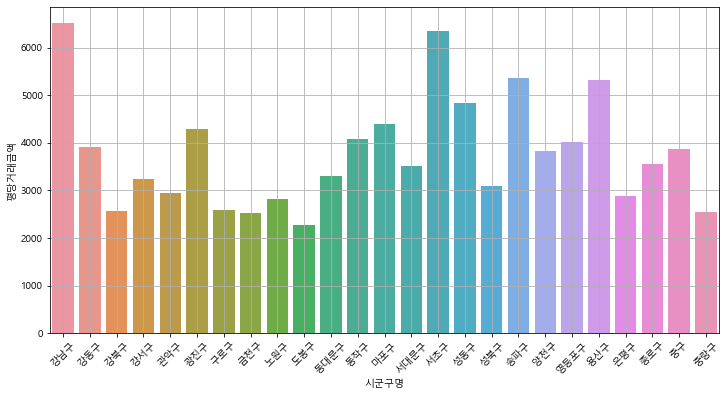

In [46]:
# 아파트만 추출
df3 = df2[df2['건물주용도'] == '아파트']

# 지역구 평당 거래 금액
val1 = df3.pivot_table(index='시군구명', values='평당거래금액')
plt.figure(figsize=(12,6))
sns.barplot(x=val1.index, y='평당거래금액', data=val1)
plt.xticks(rotation=45)
plt.grid()
plt.show()

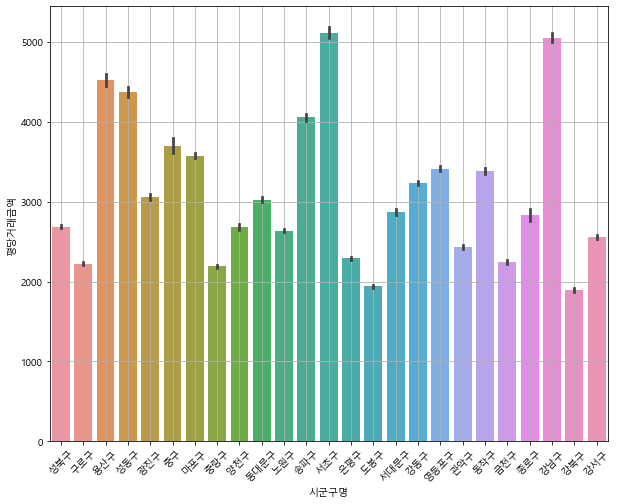

In [47]:
#시군구별 평당거래금액
plt.figure(figsize=(10,8))
sns.barplot(x=df2['시군구명'],y=df2['평당거래금액'])
plt.xticks(rotation=45)
plt.grid()

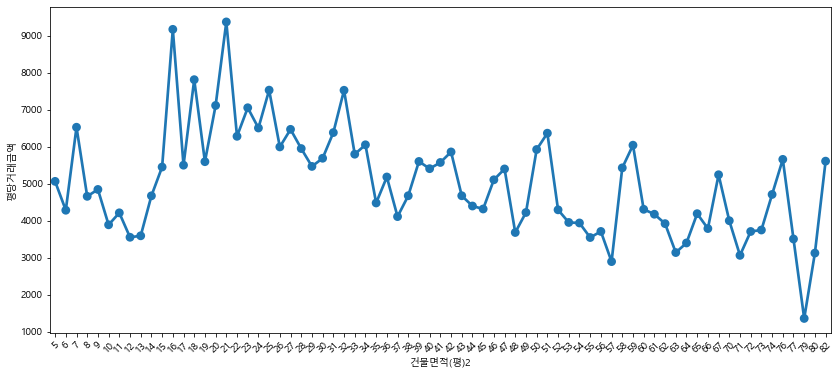

In [48]:
# 구 이름 리스트
gu_ls = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', 
         '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

# 평수 별 거래 금액
val2 = df3.pivot_table(index=['시군구명', '건물면적(평)2'], values='평당거래금액')
plt.figure(figsize=(14,6))
sns.pointplot(x=val2.loc['서초구'].index, y=val2.loc['서초구']['평당거래금액'])
plt.xticks(rotation=45)
# for i in gu_ls :
#     plt.plot(val2.loc[i].index, val2.loc[i]['평당거래금액'])
    
plt.show()

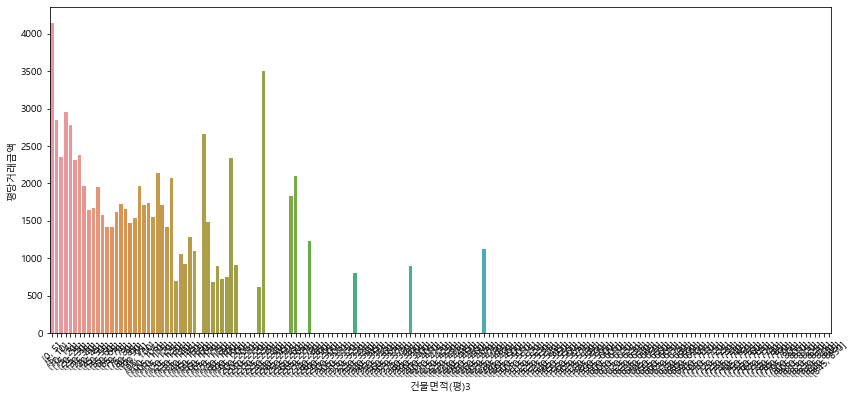

In [49]:
# 평수 별 거래 금액
val3 = df2.pivot_table(index=['시군구명', '건물면적(평)3'], values='평당거래금액')
plt.figure(figsize=(14,6))
sns.barplot(x=val3.loc['성북구'].index, y=val3.loc['성북구']['평당거래금액'])
plt.xticks(rotation=45)
plt.show()

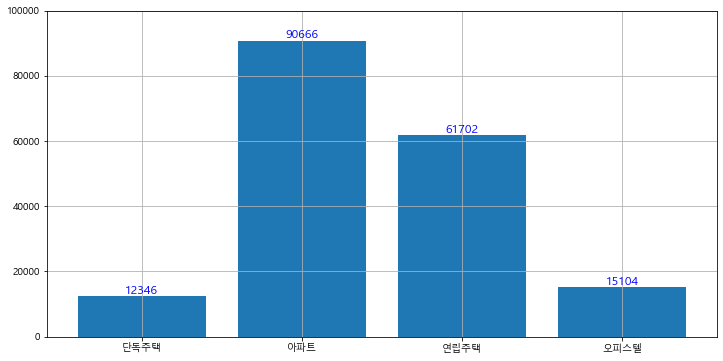

In [50]:
x = list(df2.groupby(by=['건물주용도'])['건물주용도'].count().index)
y = df2.groupby(by=['건물주용도'])['건물주용도'].count().values
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.ylim((0, 100000))
plt.grid()
for i, v in enumerate(x):
    plt.text(v, y[i], y[i], fontsize = 12, color='blue', horizontalalignment='center', verticalalignment='bottom')

plt.show()

2.특정구 지정 하여 그안에서 동별 평당 거래 금액 및 평수별 거래금액 (구 중에서 제일 비싼곳, 제일 낮은곳)\
->평수별 갯수 ?  (ex. 광화문은 회사 밀집지역이니깐 평수가 낮은 곳이 많지 않을까? , )

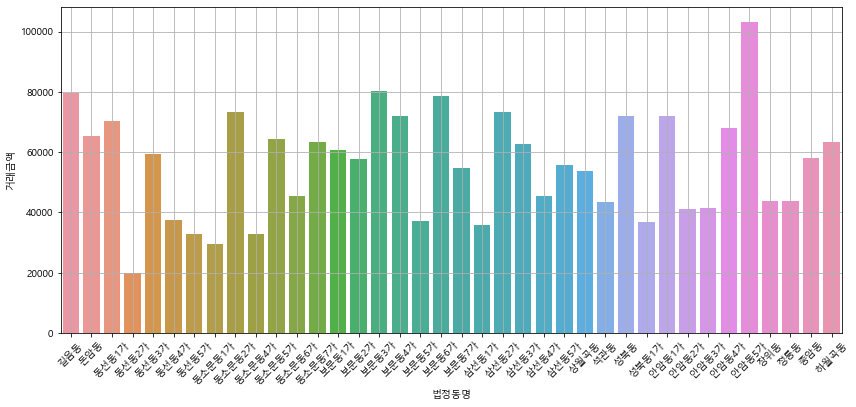

In [51]:
# 특정구를 지정하고 동별 평균 거래금액 그래프
df_a = df2[df2['시군구명']=='성북구'].pivot_table(index='법정동명')
plt.figure(figsize=(14,6))
sns.barplot(x=df_a.index, y='거래금액', data=df_a)
plt.grid()
plt.xticks(rotation=45)
plt.show()

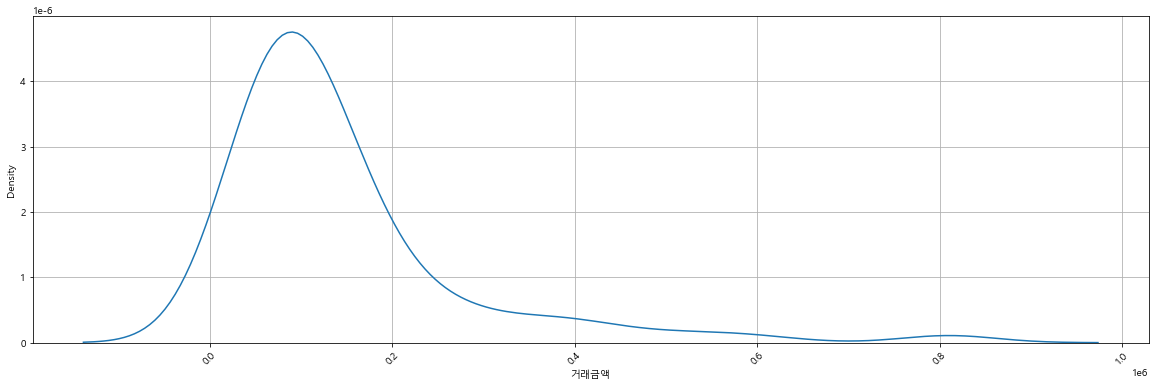

In [52]:
df_b = df2[df2['시군구명']=='성북구'].pivot_table(index='건물면적(평)2')
df_b.head()
plt.figure(figsize=(20,6))
sns.kdeplot(x='거래금액', data=df_b)
# sns.pointplot(x=df_b.index, y='거래금액', data=df_b)
plt.grid()
plt.xticks(rotation=45)
plt.show()

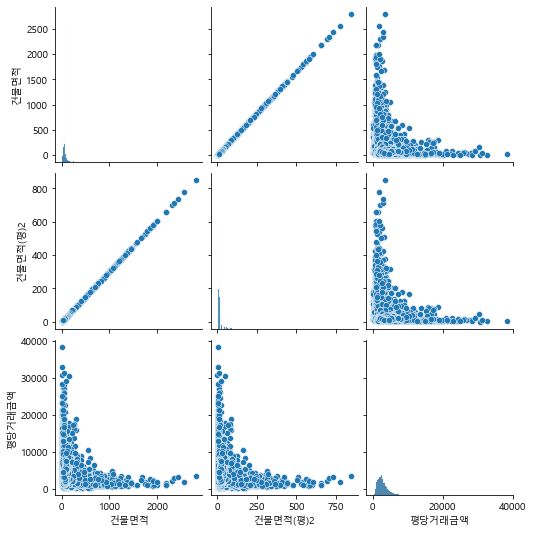

In [55]:
sns.pairplot(df2[['법정동명', '건물면적', '아파트명', '건물면적(평)2', '평당거래금액']])

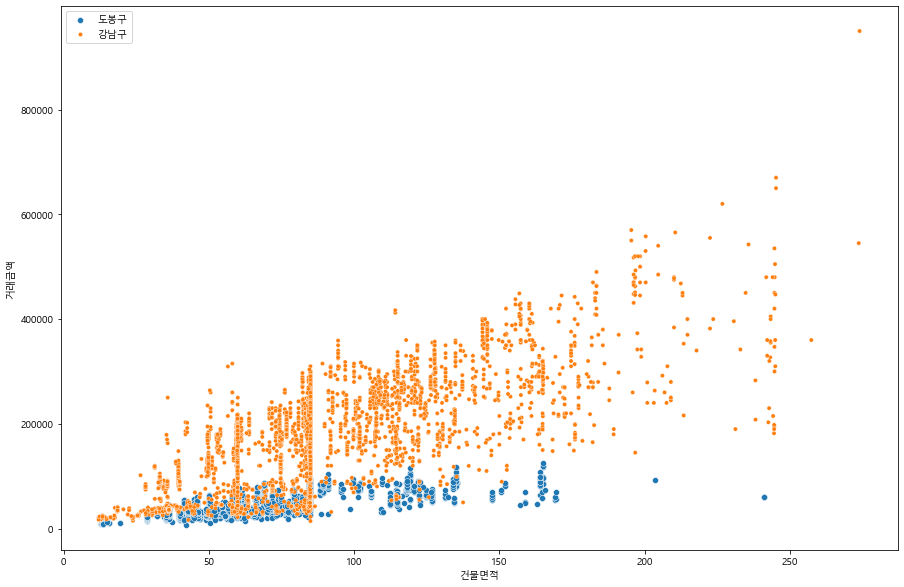

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='건물면적', 
                y='거래금액', 
#                 hue='건물면적(평)3', # different colors by group
#                 style='건물면적(평)3', # different shapes by group
#                 s=2, # marker size
                data=df3[df3.시군구명=='도봉구'])

sns.scatterplot(x='건물면적', 
                y='거래금액', 
                size=100,
#                 hue='아파트명', # different colors by group
#                 style='건물면적(평)3', # different shapes by group
#                 s=2, # marker size
                data=df3[df3.시군구명=='강남구'])
plt.legend(['도봉구', '강남구'])
plt.show()

sns.relpot(x='건물면적', y='거래금액', data=df3[df3.시군구명=='강남구'])

In [69]:
df3

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111,서울특별시,성북구
1,장위동,116.91,2.0,2001,아파트,127000.0,0.0,래미안장위퍼스트하이,35.36,35,"(30, 35]",3628.571429,서울특별시,성북구
2,장위동,59.99,17.0,2001,아파트,82000.0,0.0,래미안장위퍼스트하이,18.15,18,"(15, 20]",4555.555556,서울특별시,성북구
4,장위동,84.48,12.0,2001,아파트,115000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",4600.000000,서울특별시,성북구
5,장위동,84.48,18.0,2001,아파트,130000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",5200.000000,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179762,현석동,84.98,7.0,2001,아파트,168000.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",6720.000000,서울특별시,마포구
179763,현석동,84.98,30.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179764,현석동,84.98,17.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179766,현석동,59.40,3.0,2001,아파트,93000.0,1999.0,밤섬힐스테이트,17.97,17,"(15, 20]",5470.588235,서울특별시,마포구


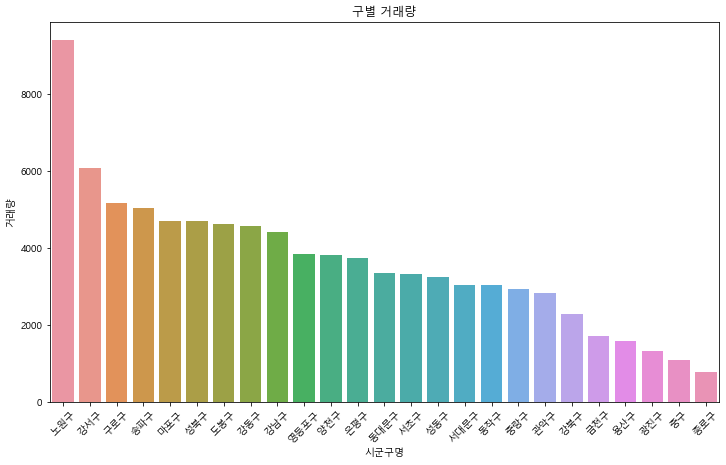

In [81]:
# 아파트만 추출해서 구별 거래량

df3 = df2[df2['건물주용도'] == '아파트']

plt.figure(figsize=(12,7))
sns.barplot(x = df3.value_counts('시군구명').index, y= df3.value_counts('시군구명').values)
plt.xticks(rotation=45)
plt.title('구별 거래량')
plt.ylabel('거래량')
plt.show()

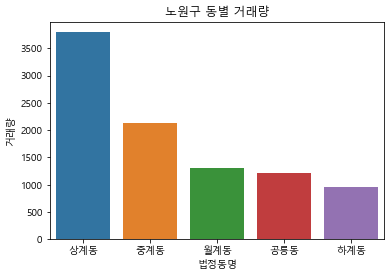

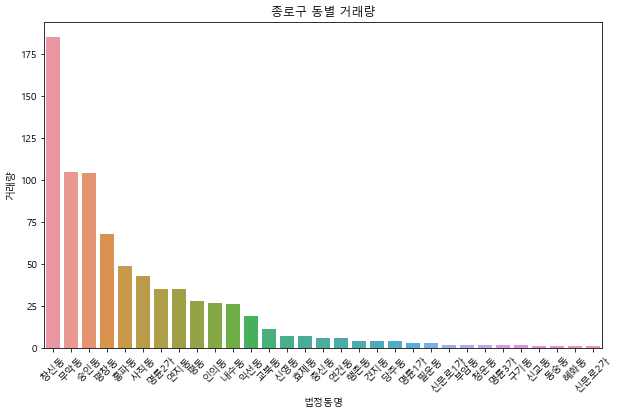

In [90]:
df3 = df2[df2['건물주용도'] == '아파트']

# 노원구 동별 거래량
volumn1 = df3[df3['시군구명'] == '노원구'].value_counts('법정동명')
sns.barplot(x=volumn1.index, y=volumn1.values)
plt.ylabel('거래량')
plt.title('노원구 동별 거래량')
plt.show()

# 종로구 동별 거래량
plt.figure(figsize=(10,6))
volumn1 = df3[df3['시군구명'] == '종로구'].value_counts('법정동명')
sns.barplot(x=volumn1.index, y=volumn1.values)
plt.ylabel('거래량')
plt.title('종로구 동별 거래량')
plt.xticks(rotation=45)
plt.show()

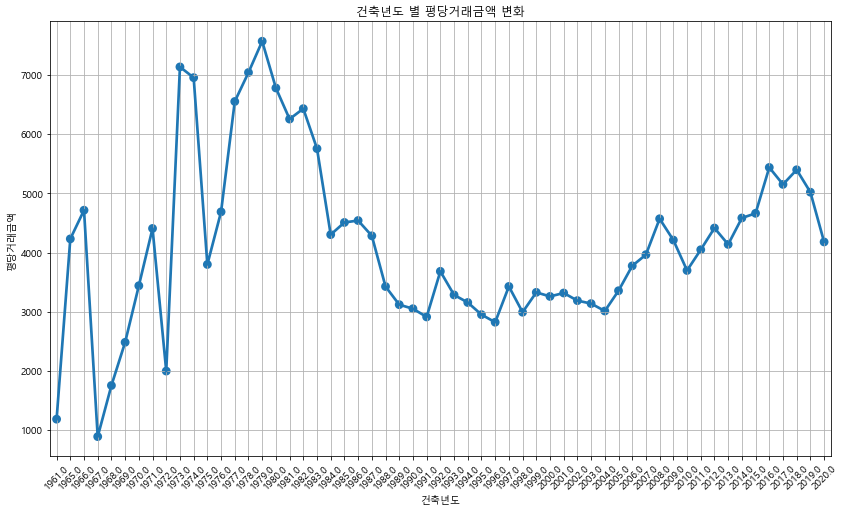

In [139]:
v1 = df3.pivot_table(index='건축년도', values='평당거래금액')
plt.figure(figsize=(14,8))
sns.pointplot(x=v1.index[1:], y=v1['평당거래금액'][1:], data=v1)
plt.grid()
plt.xticks(rotation=45)
plt.title('건축년도 별 평당거래금액 변화')
plt.show()

In [140]:
df3

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111,서울특별시,성북구
1,장위동,116.91,2.0,2001,아파트,127000.0,0.0,래미안장위퍼스트하이,35.36,35,"(30, 35]",3628.571429,서울특별시,성북구
2,장위동,59.99,17.0,2001,아파트,82000.0,0.0,래미안장위퍼스트하이,18.15,18,"(15, 20]",4555.555556,서울특별시,성북구
4,장위동,84.48,12.0,2001,아파트,115000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",4600.000000,서울특별시,성북구
5,장위동,84.48,18.0,2001,아파트,130000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",5200.000000,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179762,현석동,84.98,7.0,2001,아파트,168000.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",6720.000000,서울특별시,마포구
179763,현석동,84.98,30.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179764,현석동,84.98,17.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179766,현석동,59.40,3.0,2001,아파트,93000.0,1999.0,밤섬힐스테이트,17.97,17,"(15, 20]",5470.588235,서울특별시,마포구


In [144]:
df3[df3['시군구명'] == '노원구']

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
32983,상계동,59.99,8.0,2001,아파트,72500.0,0.0,상계역센트럴푸르지오,18.15,18,"(15, 20]",4027.777778,서울특별시,노원구
32984,상계동,84.99,26.0,2001,아파트,98000.0,0.0,상계역센트럴푸르지오,25.71,25,"(20, 25]",3920.000000,서울특별시,노원구
32985,상계동,60.00,10.0,2001,아파트,57755.0,0.0,상계역 센트럴 푸르지오,18.15,18,"(15, 20]",3208.611111,서울특별시,노원구
32986,상계동,60.00,14.0,2001,아파트,56685.0,0.0,상계역 센트럴 푸르지오,18.15,18,"(15, 20]",3149.166667,서울특별시,노원구
32988,상계동,74.96,16.0,2001,아파트,110000.0,0.0,노원 꿈에그린,22.67,22,"(20, 25]",5000.000000,서울특별시,노원구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175395,공릉동,49.60,10.0,2001,아파트,36000.0,1999.0,태강아파트,15.00,15,"(10, 15]",2400.000000,서울특별시,노원구
175397,공릉동,49.60,12.0,2001,아파트,49900.0,1999.0,태강아파트,15.00,15,"(10, 15]",3326.666667,서울특별시,노원구
175398,공릉동,17.27,13.0,2001,아파트,17500.0,2016.0,6.7디벨리움,5.22,5,"(0, 5]",3500.000000,서울특별시,노원구
175399,공릉동,59.99,19.0,2001,아파트,59500.0,1999.0,동신아파트,18.15,18,"(15, 20]",3305.555556,서울특별시,노원구


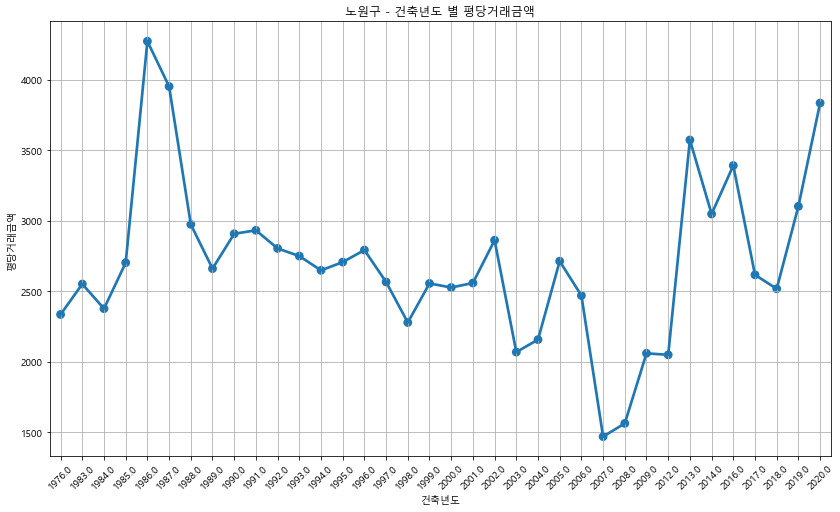

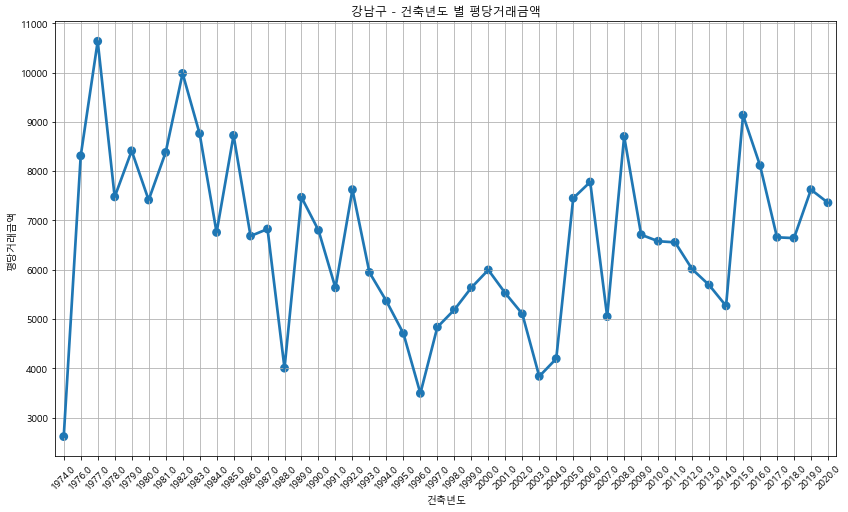

In [150]:
# 노원구 - 건축년도 별 평당 거래금액
v2 = df3[df3['시군구명'] == '노원구'].pivot_table(index='건축년도', values='평당거래금액')
plt.figure(figsize=(14,8))
sns.pointplot(x=v2.index[1:], y=v2['평당거래금액'][1:], data=v2)
plt.grid()
plt.xticks(rotation=45)
plt.title('노원구 - 건축년도 별 평당거래금액')
plt.show()

# 강남구 - 건축년도 별 평당 거래금액
v3 = df3[df3['시군구명'] == '강남구'].pivot_table(index='건축년도', values='평당거래금액')
plt.figure(figsize=(14,8))
sns.pointplot(x=v3.index[1:], y=v3['평당거래금액'][1:], data=v3)
plt.grid()
plt.xticks(rotation=45)
plt.title('강남구 - 건축년도 별 평당거래금액')
plt.show()

In [168]:
df3

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111,서울특별시,성북구
1,장위동,116.91,2.0,2001,아파트,127000.0,0.0,래미안장위퍼스트하이,35.36,35,"(30, 35]",3628.571429,서울특별시,성북구
2,장위동,59.99,17.0,2001,아파트,82000.0,0.0,래미안장위퍼스트하이,18.15,18,"(15, 20]",4555.555556,서울특별시,성북구
4,장위동,84.48,12.0,2001,아파트,115000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",4600.000000,서울특별시,성북구
5,장위동,84.48,18.0,2001,아파트,130000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",5200.000000,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179762,현석동,84.98,7.0,2001,아파트,168000.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",6720.000000,서울특별시,마포구
179763,현석동,84.98,30.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179764,현석동,84.98,17.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179766,현석동,59.40,3.0,2001,아파트,93000.0,1999.0,밤섬힐스테이트,17.97,17,"(15, 20]",5470.588235,서울특별시,마포구


In [179]:
# zzz.to_csv('../data/참고.csv', encoding='cp949')

In [296]:
idx = np.arange(5836)
val = list(df3['아파트명'].unique())
zzz = pd.DataFrame(val, index=idx)

null_ls = []
for i in range(len(zzz[0])) :
    if zzz[0][i].isalpha() :
        null_ls.append(zzz[0][i]) 
    else :
        pass
    
null_ls = sorted(null_ls)

In [297]:
# 2018년도 아파트 브랜드 순위
# 자이, 래미안, 롯데캐슬, 푸르지오, 더샾, 힐스테이트, e편한세상, 아이파크, 두산위브, 우미
apt_rank = ['자이', '래미안', '롯데캐슬', '푸르지오', '더샵', '힐스테이트', 'e편한세상', '아이파크', '두산위브']
c1, c2, c3,c4,c5,c6,c7,c8,c9 = 0,0,0,0,0,0,0,0,0
ls = []
for i in range(len(null_ls)) :
    if '자이' in null_ls[i] :
        c1 += 1
    elif '래미안' in null_ls[i] :
        c2 += 1
    elif '롯데' in null_ls[i] :
        c3 += 1
    elif '푸르지오' in null_ls[i] :
        c4 += 1
    elif '더샵' in null_ls[i] :
        c5 += 1
    elif '힐스테이트' in null_ls[i] :
        c6 += 1
    elif '편한세상' in null_ls[i] :
        c7 += 1
    elif '아이파크' in null_ls[i] :
        c8 += 1
    elif '두산' in null_ls[i] :
        c9 += 1
count_ls = [c1, c2, c3,c4,c5,c6,c7,c8,c9]

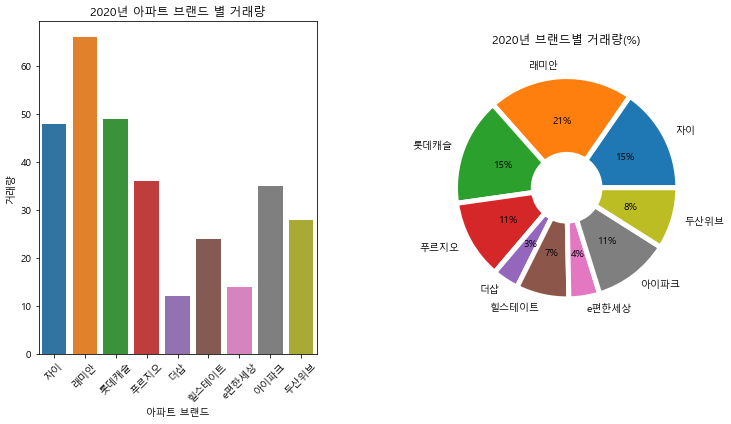

In [298]:
new_df = pd.DataFrame(count_ls, index=apt_rank)
plt.figure(figsize=(10,6))
x = new_df[0].values
y = list(new_df.index)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.subplot(1,2,1)
sns.barplot(x=y, y=x, data=new_df)
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('2020년 아파트 브랜드 별 거래량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,2,2)
plt.title('2020년 브랜드별 거래량(%)')
plt.pie(x, labels=y, autopct='%d%%', wedgeprops=wedgeprops)
plt.show()


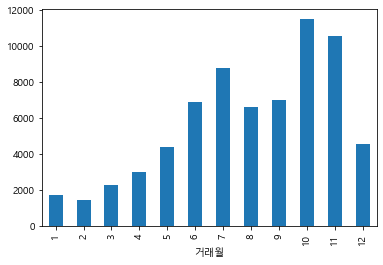

In [289]:
# 거래월별 거래량 비교

df1.value_counts('거래월').sort_index().plot(kind='bar')
plt.show()


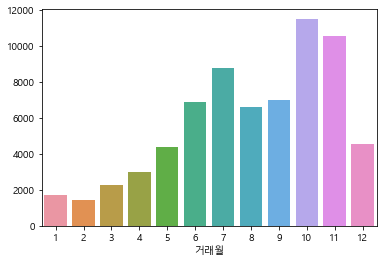

In [291]:
sns.barplot(x=df1.value_counts('거래월').sort_index().index, y=df1.value_counts('거래월').sort_index().values)
plt.show()

In [292]:
df1['']

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구


In [299]:
len(df1['아파트이름'].unique())

5014

In [314]:
idx1 = np.arange(5014)
val1 = list(df1['아파트이름'].unique())
zzz1 = pd.DataFrame(val1, index=idx1)
null_ls1 = []
for i in range(len(zzz1[0])) :
    if zzz1[0][i].isalpha() :
        null_ls1.append(zzz1[0][i]) 
    else :
        pass
null_ls1 = sorted(null_ls1)
# 2018년도 아파트 브랜드 순위
# 자이, 래미안, 롯데캐슬, 푸르지오, 더샾, 힐스테이트, e편한세상, 아이파크, 두산위브
apt_rank = ['자이', '래미안', '롯데캐슬', '푸르지오', '더샵', '힐스테이트', 'e편한세상', '아이파크', '두산위브']
c1, c2, c3,c4,c5,c6,c7,c8,c9 = 0,0,0,0,0,0,0,0,0
ls = []
for i in range(len(null_ls1)) :
    if '자이' in null_ls1[i] :
        c1 += 1
    elif '래미안' in null_ls1[i] :
        c2 += 1
    elif '롯데' in null_ls1[i] :
        c3 += 1
    elif '푸르지오' in null_ls1[i] :
        c4 += 1
    elif '더샵' in null_ls1[i] :
        c5 += 1
    elif '힐스테이트' in null_ls1[i] :
        c6 += 1
    elif '편한세상' in null_ls1[i] :
        c7 += 1
    elif '아이파크' in null_ls1[i] :
        c8 += 1
    elif '두산' in null_ls1[i] :
        c9 += 1
count_ls1 = [c1, c2, c3,c4,c5,c6,c7,c8,c9]

new_df1 = pd.DataFrame(count_ls1, index=apt_rank)

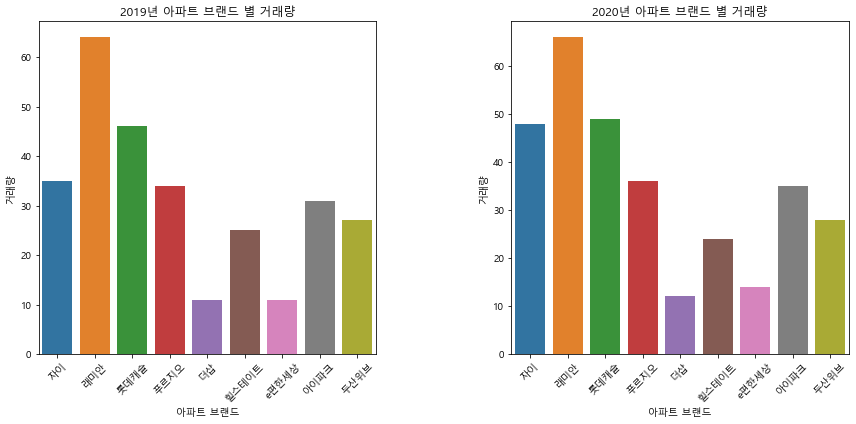

In [316]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x=new_df1.index, y=new_df1[0], data=new_df1)
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('2019년 아파트 브랜드 별 거래량')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
sns.barplot(x=y, y=x, data=new_df)
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('2020년 아파트 브랜드 별 거래량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

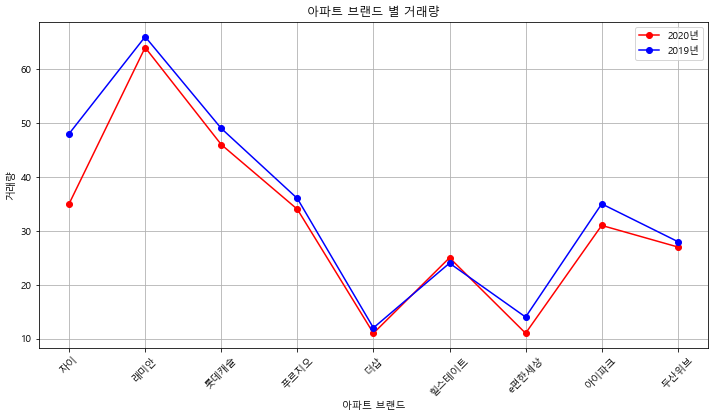

In [329]:
plt.figure(figsize=(12,6))

plt.plot(new_df1.index, new_df1[0], '-or')
plt.plot(list(new_df.index), new_df[0].values,'-ob')
plt.grid()
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('아파트 브랜드 별 거래량')
plt.legend(['2020년', '2019년'])
plt.xticks(rotation=45)
plt.show()

In [307]:
print(count_ls, count_ls1)

[48, 66, 49, 36, 12, 24, 14, 35, 28] [35, 64, 46, 34, 11, 25, 11, 31, 27]


# 3. 분석 결과